In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.optimize import minimize

In [25]:
# Define the Poisson probability mass function (PMF)
def poisson_pmf(k, lambd):
    return poisson.pmf(k, lambd)

# Define the negative log-likelihood function for the Poisson distribution
def neg_log_likelihood(params, data):
    lambd = params[0]
    return -np.sum(poisson.logpmf(data, lambd))


In [26]:
import pandas as pd
df = pd.read_csv("possion_dataset.csv")

#Set random seed for reproducibility
#np.random.seed(42)
#Generate a sample dataset with a Poisson distribution
#lambda_true = 36  # True average rate of events per interval
#sample_size = 100
#sample_data = np.random.poisson(lambda_true, size=sample_size)


sample_data=df['event_count']
# Initial guess for the parameter
initial_guess = [2.0]

# Use minimize to estimate the lambda parameter from the sample data
result = minimize(neg_log_likelihood, initial_guess, args=(sample_data,), method='L-BFGS-B')

# Extract the estimated lambda parameter
estimated_lambda = result.x[0]

In [27]:
#sample_data

In [28]:
print(f"Estimated Lambda: {estimated_lambda}")

Estimated Lambda: 36.000010662665


In [30]:
# Generate values for the Poisson PMF using the estimated lambda
x_values = np.arange(0, max(sample_data) + 1)
poisson_pmf_values = poisson_pmf(x_values, estimated_lambda)

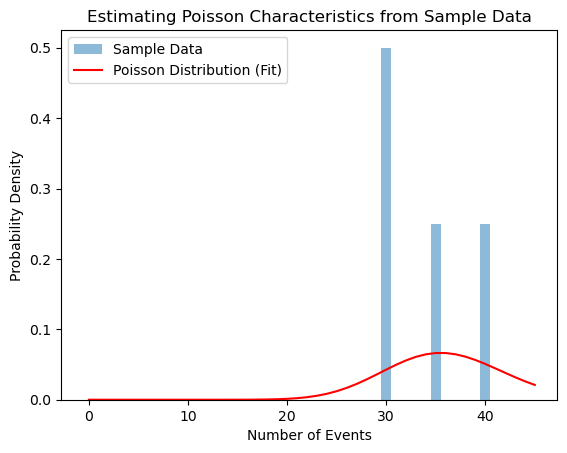

In [31]:
# Plot the histogram of the sample data
plt.hist(sample_data, bins=np.arange(0, max(sample_data) + 1) - 0.5, density=True, alpha=0.5, label='Sample Data')

# Plot the fitted Poisson PMF
plt.plot(x_values, poisson_pmf_values, 'r-', label='Poisson Distribution (Fit)')

plt.title('Estimating Poisson Characteristics from Sample Data')
plt.xlabel('Number of Events')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

#print(f"True Lambda: {lambda_true}")
